In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [5]:
url

'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

In [6]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigereeFunction', 'age', 'Outcome']

In [7]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigereeFunction',
 'age',
 'Outcome']

In [8]:
df = pd.read_csv(url, names = cols)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigereeFunction,age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
#Split features and target
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']

In [10]:
#Train_tst-split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 42)

In [11]:
#trin decision tree
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state = 42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [16]:
#predict and Evaluate
from sklearn.metrics import accuracy_score
print("Training Accuracy:", clf.score(X_train, Y_train))
print("testing Accuracy:", clf.score(X_test, Y_test))

Training Accuracy: 0.7752442996742671
testing Accuracy: 0.7662337662337663


In [18]:
rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [19]:
print("Training Accuracy:", rf_clf.score(X_train, Y_train))
print("testing Accuracy:", rf_clf.score(X_test, Y_test))

Training Accuracy: 1.0
testing Accuracy: 0.7207792207792207


In [21]:
importances=rf_clf.feature_importances_
feat_importance=pd.Series(importances,index=X.columns).sort_values(ascending=False)

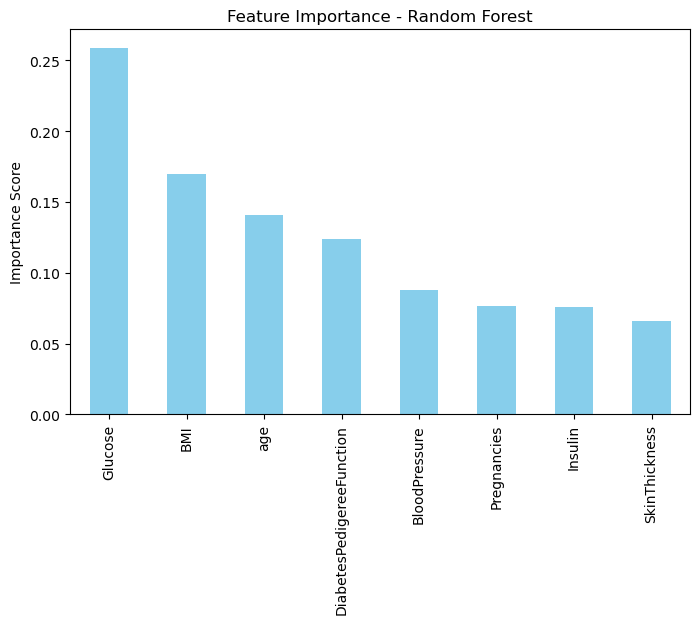

In [25]:
plt.figure(figsize=(8,5))
feat_importance.plot(kind='bar',color="skyblue")
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()